<a href="https://colab.research.google.com/github/singhritu0709/Singhritu/blob/main/Pythia_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing dependencies here
import numpy as np
import pandas as pd
import os

# visualizations
import matplotlib.pyplot as plt

# data stratifying and splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer

# class imbalance
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# algorithms/models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
# feature engineering
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("stopwords")
# pos tagging
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# accuracy scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
)

# performance check
import time
import warnings

warnings.filterwarnings("ignore")

# sparse to dense
from sklearn.base import TransformerMixin


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# saving the model
from joblib import dump

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# for splitting data into training and holdout dataset
from sklearn.model_selection import train_test_split

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# cleaning and dropping stop words
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

# lemmitizing
from nltk.stem import WordNetLemmatizer

# performance check
import time


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Cleaning 

In [ ]:
# reading the dataset
df = pd.read_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "mbti_1.csv"))

# splitting data into training and holdout dataset
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)



In [ ]:
personality_data.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "personality_data.csv"), index=False)

In [ ]:
df_holdout.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "df_holdout.csv"), index=False)

In [ ]:
# checking the value counts to make sure data is stratified
print(personality_data["type"].value_counts())
print(df_holdout["type"].value_counts())

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64
INFP    18
INFJ    15
INTP    13
INTJ    11
ENFP     7
ENTP     7
ISFP     3
ISTP     3
ISFJ     2
ENFJ     2
ENTJ     2
ISTJ     2
ESTP     1
ESFP     1
Name: type, dtype: int64


In [ ]:
# reading the dataset that will be used for training and testing the model
personality_data = pd.read_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "personality_data.csv"))

In [ ]:
# looking at the top 5 rows of the dataset
personality_data.head()

type                                              posts
0  INFJ  'When asked of the things you wish you did ear...
1  INFJ  'I love both and they are equally important to...
2  INFJ  Really? You think implying that everyone who i...
3  ENFJ  'Love is a crazy thing.   Se is our best form ...
4  INTP  'I am a physics undergrad with a computation e...

In [ ]:
# checking the number of rows and columns
personality_data.shape

(8588, 2)

In [ ]:
# checking for missing values
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

In [ ]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: type, dtype: int64

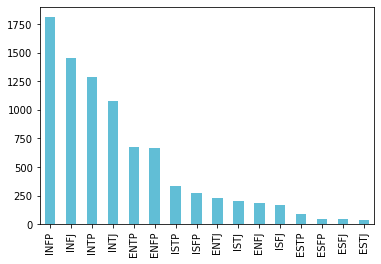

In [ ]:
# visually showing the class imbalance
personality_data["type"].value_counts().plot(kind="bar", color="#61BED6")
plt.show()

In [ ]:
# to handle the class imbalance better, converting the 16 classes into 4 more balanced classes

personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

# rearranging the dataframe columns
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]
personality_data.head()

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   
2  INFJ             0           0            0           1   
3  ENFJ             1           0            0           1   
4  INTP             0           0            1           0   

                                               posts  
0  'When asked of the things you wish you did ear...  
1  'I love both and they are equally important to...  
2  Really? You think implying that everyone who i...  
3  'Love is a crazy thing.   Se is our best form ...  
4  'I am a physics undergrad with a computation e...

Extroversion vs. Introversion

I - 0

E - 1

Sensing vs. Intuition

N - 0

S - 1

Thinking vs. Feeling

F - 0

T - 1

Judging vs. Perceiving

P - 0

J - 1

In [ ]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [ ]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 6609
Extrovert Count: 1979
Intuition Count: 7403
Sensing Count: 1185
Feeling Count: 4646
Thinking Count: 3942
Perceiving Count: 5188
Judging Count: 3400


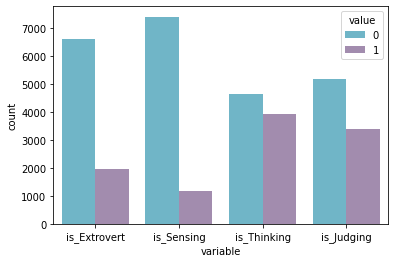

In [ ]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
    ),
    palette=["#61BED6", "#A386B4"],
)

plt.show()

In [ ]:
corr = personality_data[
    ["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]
].corr()
corr.style.background_gradient(cmap="Blues").set_precision(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


In [ ]:
# converting posts into lower case
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# replacing ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)

personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)

# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)

# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " "
)

# dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

In [ ]:
personality_data.head()

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   
2  INFJ             0           0            0           1   
3  ENFJ             1           0            0           1   
4  INTP             0           0            1           0   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   
2  Really? You think implying that everyone who i...   
3  'Love is a crazy thing.   Se is our best form ...   
4  'I am a physics undergrad with a computation e...   

                                         clean_posts  
0   when asked of the things you wish you did ear...  
1   i love both and they are equally important to...  
2  really  you think implying that everyone who i...  
3   love is a crazy thing    se is our best form ...  
4   i am a physics undergrad with a computation e...

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# lemmitizing (excluding stop words in this step)

t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)

print(f"Lemmitizing Time: {time.time() - t} seconds")

Lemmitizing Time: 1584.9621891975403 seconds


In [ ]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
)

In [ ]:
# checking the cleaned and lemmitized data
personality_data.head()

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   
2  INFJ             0           0            0           1   
3  ENFJ             1           0            0           1   
4  INTP             0           0            1           0   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   
2  Really? You think implying that everyone who i...   
3  'Love is a crazy thing.   Se is our best form ...   
4  'I am a physics undergrad with a computation e...   

                                         clean_posts  
0   asked thing wish earlier       find answering...  
1   love equally important  music window soul  in...  
2  really  think implying everyone entrepreneur s...  
3   love crazy thing     best form communication ...  
4   physic undergrad computation emphasis  learni...

In [ ]:
personality_data.shape

(8588, 7)

In [ ]:
# lemmitizing took long. So saving the clean and lemmitized file to save time in further processing.
personality_data.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "clean_data_1.csv"), index=False)

In [ ]:
# feature engineering
import re

# pos tagging
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize



SENTIMENT ANALYSIS & PART OF SPEECH TAGGING

In [ ]:
# sentiment scoring
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Feature Engineering - II

In [ ]:
# looking at the top 5 rows of the dataset
personality_data.head()

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   
2  INFJ             0           0            0           1   
3  ENFJ             1           0            0           1   
4  INTP             0           0            1           0   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   
2  Really? You think implying that everyone who i...   
3  'Love is a crazy thing.   Se is our best form ...   
4  'I am a physics undergrad with a computation e...   

                                         clean_posts  
0   asked thing wish earlier       find answering...  
1   love equally important  music window soul  in...  
2  really  think implying everyone entrepreneur s...  
3   love crazy thing     best form communication ...  
4   physic undergrad computation emphasis  learni...

In [ ]:
# checking the number of rows and columns
personality_data.shape

(8588, 7)

In [ ]:
# checking for missing values
personality_data.isnull().sum()

type            0
is_Extrovert    0
is_Sensing      0
is_Thinking     0
is_Judging      0
posts           0
clean_posts     0
dtype: int64

Sentiments Analysis Score

In [ ]:
# sentiment scoring for each user
t = time.time()

analyzer = SentimentIntensityAnalyzer()

nlp_sentiment_score = []

for post in personality_data["clean_posts"]:
    score = analyzer.polarity_scores(post)
    nlp_sentiment_score.append(score)

print(f"Sentiment Scoring Time: {time.time() - t:.2f} seconds")

Sentiment Scoring Time: 88.15 seconds


In [ ]:
# segregating the indiviual sentiment scores - compound, positive, negative and neutral
personality_data["compound_sentiment"] = [
    score["compound"] for score in nlp_sentiment_score
]
personality_data["pos_sentiment"] = [score["pos"] for score in nlp_sentiment_score]
personality_data["neg_sentiment"] = [score["neg"] for score in nlp_sentiment_score]
personality_data["neu_sentiment"] = [score["neu"] for score in nlp_sentiment_score]

In [ ]:
# scaling to handle negative values in sentiment scores (for Naive Bayes)
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Sentiment scores have negative values that Naive Bayes can't handle. So scaling it.

min_max_scaler = MinMaxScaler()
personality_data["compound_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["compound_sentiment"]).reshape(-1, 1)
)
personality_data["pos_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["pos_sentiment"]).reshape(-1, 1)
)
personality_data["neg_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neg_sentiment"]).reshape(-1, 1)
)
personality_data["neu_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neu_sentiment"]).reshape(-1, 1)
)

In [ ]:
# checking to see if sentiment scores introduced any null value
personality_data.isnull().sum()

type                  0
is_Extrovert          0
is_Sensing            0
is_Thinking           0
is_Judging            0
posts                 0
clean_posts           0
compound_sentiment    0
pos_sentiment         0
neg_sentiment         0
neu_sentiment         0
dtype: int64

POS Tagging

In [ ]:
# creating tag_posts column that will have each post as a separate list in a row. tag_posts will be a list of 50 lists.

# replacing urls with domain name
personality_data["tag_posts"] = personality_data["posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
    lambda match: match.group(2),
)

# replacing ||| with space
personality_data["tag_posts"] = [
    post for post in personality_data["tag_posts"].str.split("\|\|\|")
]

In [ ]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# parts of speech tagging for each word
t = time.time()

personality_data["tagged_words"] = personality_data["tag_posts"].apply(
    lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x]
)

print(f"POS Tagging Time: {time.time() - t} seconds")

POS Tagging Time: 723.6165254116058 seconds


In [ ]:
# creating list of unique POS tags
tag_set = set()

for i, data in personality_data["tagged_words"].iteritems():
    for tup in data[0]:
        tag_set.add(tup[1])

tag_list = list(tag_set)

In [ ]:
# calculating mean and standard deviation of pos tags for each user
t = time.time()


def pos_cat(x, tag):
    return [len([y for y in line if y[1] == tag]) for line in x]


for col in tag_list:
    personality_data["POS_" + col + "_mean"] = personality_data["tagged_words"].apply(
        lambda x: np.mean(pos_cat(x, col))
    )
    personality_data["POS_" + col + "_std"] = personality_data["tagged_words"].apply(
        lambda x: np.std(pos_cat(x, col))
    )

print(f"POS Stats Time: {time.time() - t} seconds")

POS Stats Time: 157.41513657569885 seconds


In [ ]:
# grouping pos tags based on stanford list
tags_dict = {
    "ADJ": ["JJ", "JJR", "JJS"],
    "ADP": ["EX", "TO"],
    "ADV": ["RB", "RBR", "RBS", "WRB"],
    "CONJ": ["CC", "IN"],
    "DET": ["DT", "PDT", "WDT"],
    "NOUN": ["NN", "NNS", "NNP", "NNPS"],
    "NUM": ["CD"],
    "PRT": ["RP"],
    "PRON": ["PRP", "PRP$", "WP", "WP$"],
    "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
    "X": ["FW", "LS", "UH"],
}

In [ ]:
# Stanford POS tag stats
t = time.time()


def stanford_tag(x, tag):
    tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
    return tags_list


for col in tags_dict.keys():
    personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
        lambda x: np.median(stanford_tag(x, col))
    )

print(f"Stanford POS Stats Time: {time.time() - t} seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


Stanford POS Stats Time: 34.76722264289856 seconds


In [ ]:
# a quick look at the data
personality_data.head(2)

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   

                                         clean_posts  compound_sentiment  \
0   asked thing wish earlier       find answering...              0.9998   
1   love equally important  music window soul  in...              0.9999   

   pos_sentiment  neg_sentiment  ...  ADV_avg CONJ_avg DET_avg  NOUN_avg  \
0       0.413333       0.136150  ...      4.0      5.0     3.0       6.0   
1       0.594667       0.134585  ...      3.0      5.0     2.0       5.0   

   NUM_avg  PRT_avg  PRON_avg  VERB_avg  ._avg  X_avg  
0      0.0      0.0       4.0       8.0    5.0    0.0  
1      0.0      0.0       5.0       8.0    3.0    0.0  

[2 rows x 115 columns]

In [ ]:
# Sentiment scoring & POS Tagging took long. So saving the scored & tagged file to save time in the next step.
personality_data.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "clean_data_2.csv"), index=False)

Counts & Vectorization

In [ ]:
# lookign at the top 5 rows of the dataset
personality_data.head()

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   
2  INFJ             0           0            0           1   
3  ENFJ             1           0            0           1   
4  INTP             0           0            1           0   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   
2  Really? You think implying that everyone who i...   
3  'Love is a crazy thing.   Se is our best form ...   
4  'I am a physics undergrad with a computation e...   

                                         clean_posts  compound_sentiment  \
0   asked thing wish earlier       find answering...            0.999800   
1   love equally important  music window soul  in...            0.999900   
2  really  think implying everyone entrepreneur s...            0.985996   
3   love crazy thing     best form communication ...            0.999650   
4   physic undergrad computation emphasis  learni...            0.999700   

   pos_sentiment  neg_sentiment  ...  ADV_avg CONJ_avg DET_avg  NOUN_avg  \
0       0.413333       0.136150  ...      4.0      5.0     3.0       6.0   
1       0.594667       0.134585  ...      3.0      5.0     2.0       5.0   
2       0.329333       0.306729  ...      2.0      3.0     2.0       5.0   
3       0.426667       0.273865  ...      3.0      4.0     2.5       6.0   
4       0.422667       0.173709  ...      2.0      4.0     2.0       6.0   

   NUM_avg  PRT_avg  PRON_avg  VERB_avg  ._avg  X_avg  
0      0.0      0.0       4.0       8.0    5.0    0.0  
1      0.0      0.0       5.0       8.0    3.0    0.0  
2      0.0      0.0       4.0       7.0    4.0    0.0  
3      0.0      0.0       5.0       7.5    5.0    0.0  
4      0.0      0.0       3.0       5.0    4.0    0.0  

[5 rows x 115 columns]

In [ ]:
# checking the number of rows and columns
personality_data.shape

(8588, 115)

In [ ]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Feature Engineering - III
Counting
Question/Exclamation/Colon/Emoji Count

In [ ]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique) / 50


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count / 50


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / 50

In [ ]:
personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?") / 50)
personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!") / 50)
personality_data["colons"] = personality_data["posts"].apply(colons)
personality_data["emojis"] = personality_data["posts"].apply(emojis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

Word Count

In [ ]:
personality_data["word_count"] = personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


Word Stats

In [ ]:
# stats

t = time.time()

# personality_data["avg_word_ct"] = personality_data["word_count"].apply(lambda s: s / 50)

personality_data["post_length_var"] = personality_data["posts"].apply(
    lambda x: np.var([len(post.split()) for post in x.split("|||")])
)

print(f"Time Taken: {time.time() - t}")

Time Taken: 1.4982504844665527


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


Upper Case count

In [ ]:
personality_data["upper"] = personality_data["posts"].apply(
    lambda x: len([x for x in x.split() if x.isupper()]) / 50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


Link Count

In [ ]:
personality_data["link_count"] = personality_data["posts"].apply(
    lambda s: s.count("http") / 50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


Ellipse Count

In [ ]:
ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50 for posts in personality_data["posts"]
]
personality_data["ellipses"] = ellipses_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


Image count

In [ ]:
personality_data["img_count"] = [
    len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post)) / 50
    for post in personality_data["posts"]
]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
personality_data.head(2)

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   

                                         clean_posts  compound_sentiment  \
0   asked thing wish earlier       find answering...              0.9998   
1   love equally important  music window soul  in...              0.9999   

   pos_sentiment  neg_sentiment  ...    em colons emojis  word_count  \
0       0.413333       0.136150  ...  0.22   0.32   0.08       30.98   
1       0.594667       0.134585  ...  0.36   0.14   0.00       28.58   

   unique_words  post_length_var  upper  link_count  ellipses  img_count  
0         14.92        78.414931   1.46        0.04      0.62        0.0  
1         12.72       160.744400   1.62        0.02      0.04        0.0  

[2 rows x 126 columns]

In [ ]:
# checking the data types to make sure they still look good
personality_data.dtypes

type                object
is_Extrovert         int64
is_Sensing           int64
is_Thinking          int64
is_Judging           int64
                    ...   
post_length_var    float64
upper              float64
link_count         float64
ellipses           float64
img_count          float64
Length: 126, dtype: object

In [ ]:
# checking for null values again
personality_data.isnull().sum()

type               0
is_Extrovert       0
is_Sensing         0
is_Thinking        0
is_Judging         0
                  ..
post_length_var    0
upper              0
link_count         0
ellipses           0
img_count          0
Length: 126, dtype: int64

In [ ]:
# Saving the data with counts
personality_data.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "clean_data_3.csv"), index=False)

Vectorize - For analysis purpose only. For model, the vectorization will be added to the pipeline.

In [ ]:
# Using TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.8)
tfidf_words = tfidf_vectorizer.fit_transform(personality_data["clean_posts"])
tfidf_vectorized_data = pd.DataFrame(
    data=tfidf_words.toarray(), columns=tfidf_vectorizer.get_feature_names()
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vectorized_data.head()

aback  abandon  abandoned  abandoning  abandonment  abbey  abbreviation  \
0    0.0      0.0        0.0         0.0          0.0    0.0           0.0   
1    0.0      0.0        0.0         0.0          0.0    0.0           0.0   
2    0.0      0.0        0.0         0.0          0.0    0.0           0.0   
3    0.0      0.0        0.0         0.0          0.0    0.0           0.0   
4    0.0      0.0        0.0         0.0          0.0    0.0           0.0   

   abhor  abide  ability  ...  zelda  zen  zero  zodiac  zombie  zone  zoned  \
0    0.0    0.0      0.0  ...    0.0  0.0   0.0     0.0     0.0   0.0    0.0   
1    0.0    0.0      0.0  ...    0.0  0.0   0.0     0.0     0.0   0.0    0.0   
2    0.0    0.0      0.0  ...    0.0  0.0   0.0     0.0     0.0   0.0    0.0   
3    0.0    0.0      0.0  ...    0.0  0.0   0.0     0.0     0.0   0.0    0.0   
4    0.0    0.0      0.0  ...    0.0  0.0   0.0     0.0     0.0   0.0    0.0   

   zoning  zoo  zoom  
0     0.0  0.0   0.0  
1     0.0  0.0   0.0  
2     0.0  0.0   0.0  
3     0.0  0.0   0.0  
4     0.0  0.0   0.0  

[5 rows x 10039 columns]

In [ ]:
# Saving the TF-IDF vectorized data
tfidf_vectorized_data.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "tfidf_vectorized_data.csv"), index=False)

In [ ]:
# Using CountVectorizer

count_vectorizer = CountVectorizer(decode_error="ignore", min_df=25, max_df=0.8,)

count_words = count_vectorizer.fit_transform(personality_data["clean_posts"])
count_vectorized_data = pd.DataFrame(
    data=count_words.toarray(), columns=count_vectorizer.get_feature_names()
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count_vectorized_data.head()

aback  abandon  abandoned  abandoning  abandonment  abbey  abbreviation  \
0      0        0          0           0            0      0             0   
1      0        0          0           0            0      0             0   
2      0        0          0           0            0      0             0   
3      0        0          0           0            0      0             0   
4      0        0          0           0            0      0             0   

   abhor  abide  ability  ...  zelda  zen  zero  zodiac  zombie  zone  zoned  \
0      0      0        0  ...      0    0     0       0       0     0      0   
1      0      0        0  ...      0    0     0       0       0     0      0   
2      0      0        0  ...      0    0     0       0       0     0      0   
3      0      0        0  ...      0    0     0       0       0     0      0   
4      0      0        0  ...      0    0     0       0       0     0      0   

   zoning  zoo  zoom  
0       0    0     0  
1       0    0     0  
2       0    0     0  
3       0    0     0  
4       0    0     0  

[5 rows x 10039 columns]

In [ ]:
# Saving the Count vectorized data
count_vectorized_data.to_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "count_vectorized_data.csv"), index=False)

visualizations

In [ ]:
# visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# word cloud
from wordcloud import WordCloud
import re

# performance check
import time
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# variables
data_path = os.path.join("..", "/content/drive/MyDrive/MBTI")
img_path = os.path.join("..", "/content/drive/MyDrive/MBTI/MBTI-I", "/content/drive/MyDrive/MBTI/MBTI-I/Images")

nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    "ENTP": nt,
    "INTP": nt,
    "INTJ": nt,
    "ENTJ": nt,
    "INFJ": nf,
    "ENFJ": nf,
    "INFP": nf,
    "ENFP": nf,
    "ISFJ": sj,
    "ISTJ": sj,
    "ESTJ": sj,
    "ESFJ": sj,
    "ISFP": sp,
    "ISTP": sp,
    "ESTP": sp,
    "ESFP": sp,
}

Word Clouds

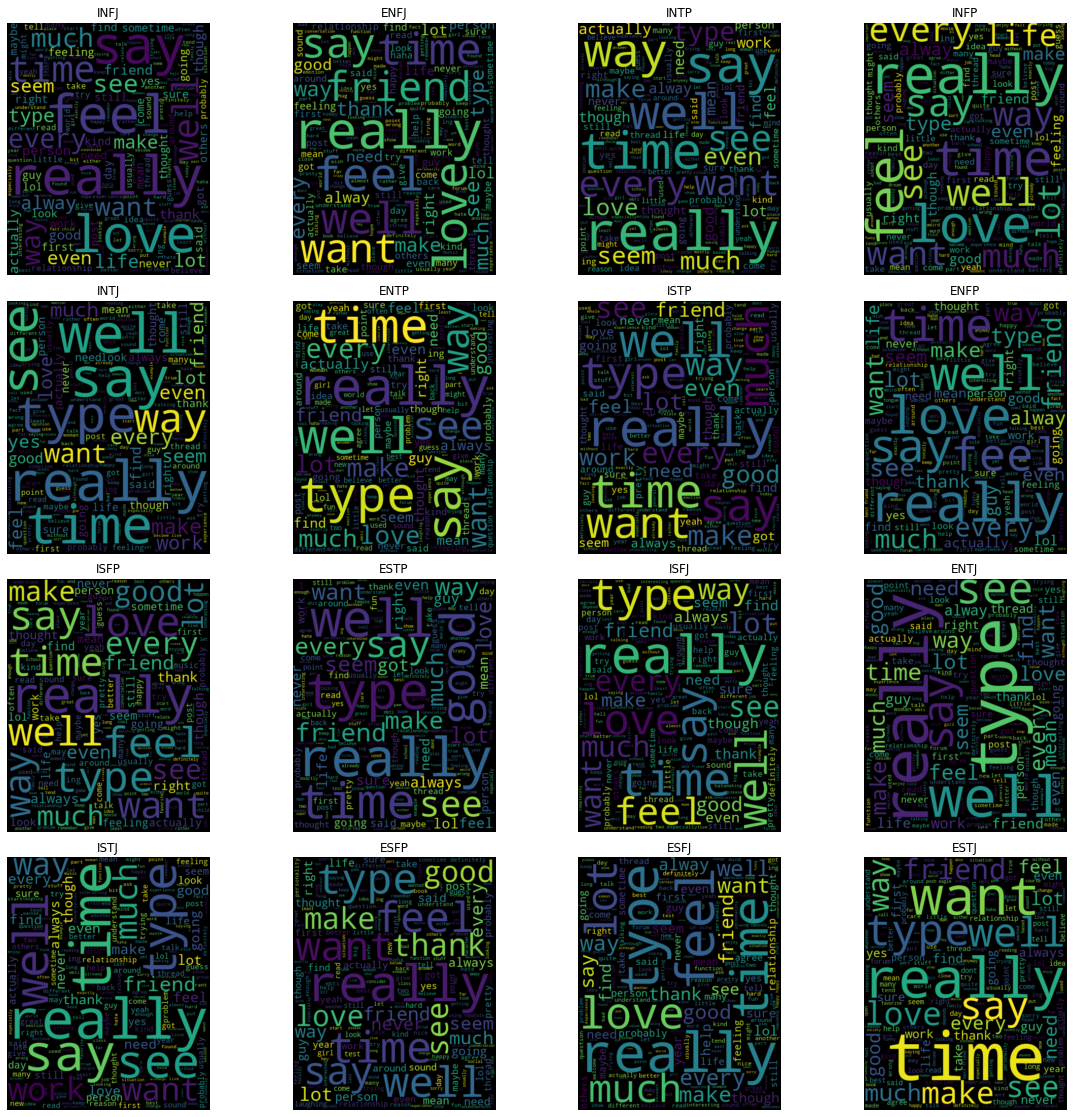

In [ ]:
# creating word clouds for each of the 16 personality types

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.ravel()

for i, mbti_type in enumerate(personality_data["type"].unique()):
    wordcloud_words = " ".join(
        [
            re.sub(r"(people)|(think)|(know)|(thing)|(one)", "", user_posts,)
            for user_posts in personality_data[personality_data["type"] == mbti_type][
                "clean_posts"
            ]
        ]
    )

    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti_type)

Count
Word Count by Type

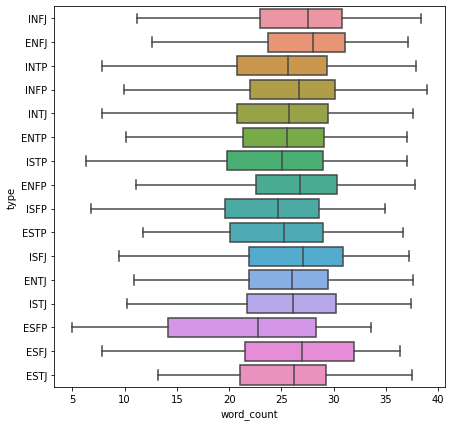

In [ ]:
# boxplot of word counts
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="word_count", data=personality_data, showfliers=False)


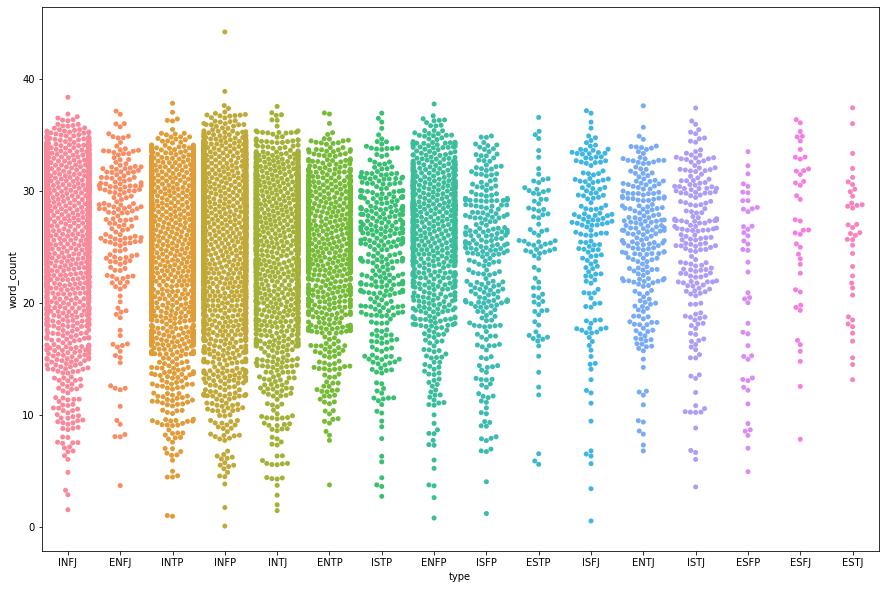

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="word_count", data=personality_data)


Compound Sentiment Score by Type


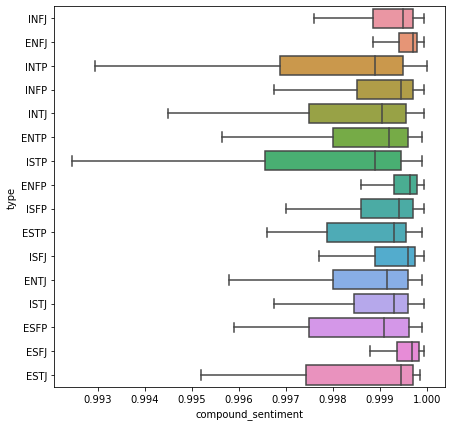

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="compound_sentiment", data=personality_data, showfliers=False)

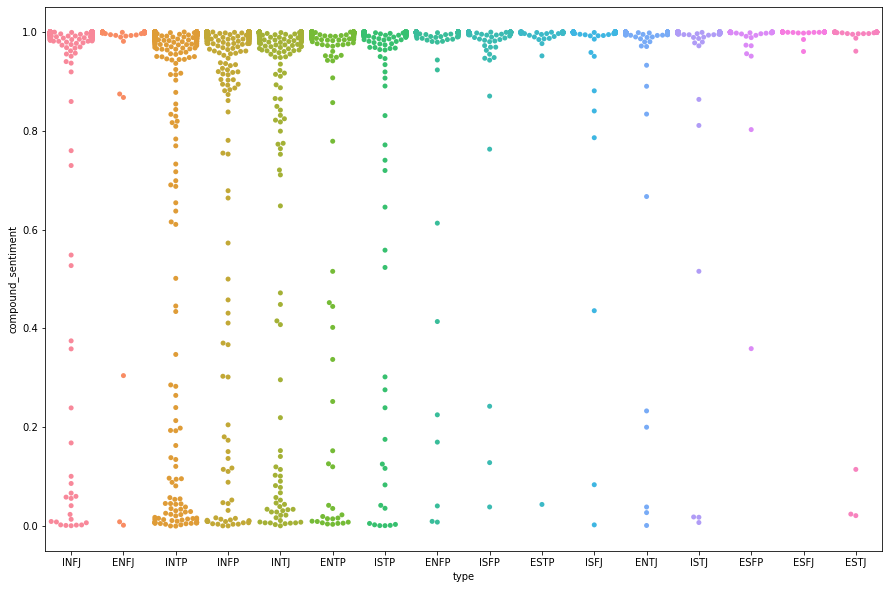

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="compound_sentiment", data=personality_data)

Positive Sentiment Score by Type

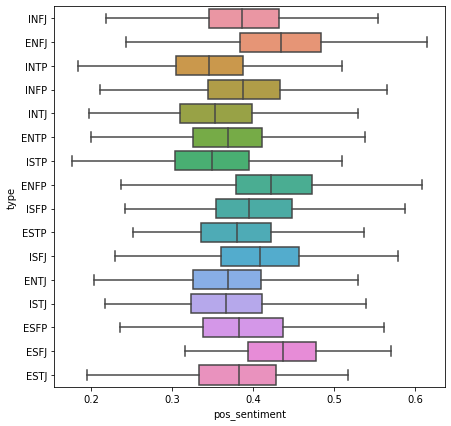

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="pos_sentiment", data=personality_data, showfliers=False)

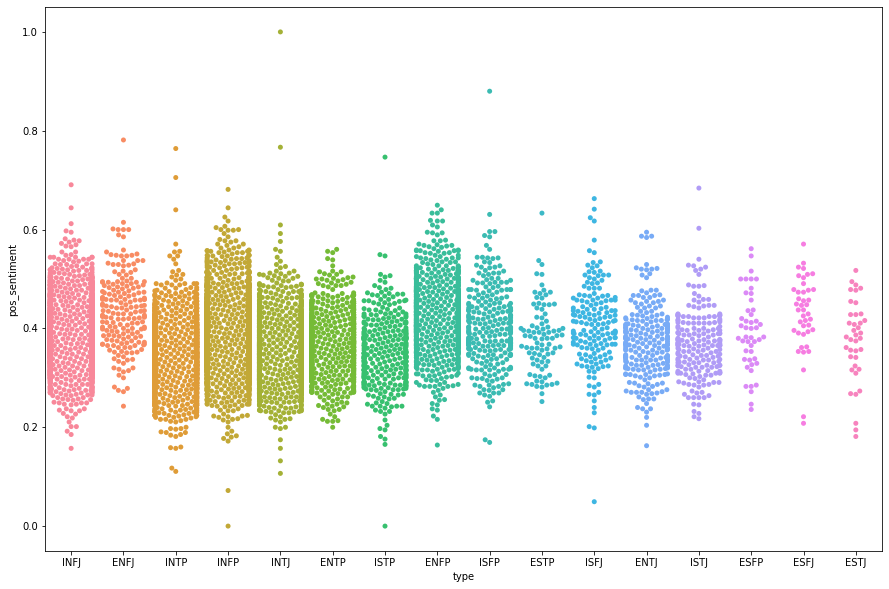

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="pos_sentiment", data=personality_data)

Negative Sentiment Score by Type

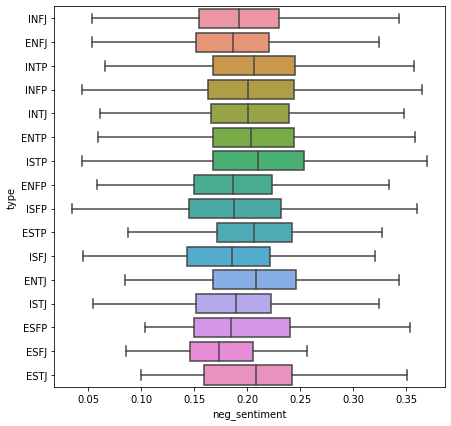

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neg_sentiment", data=personality_data, showfliers=False)

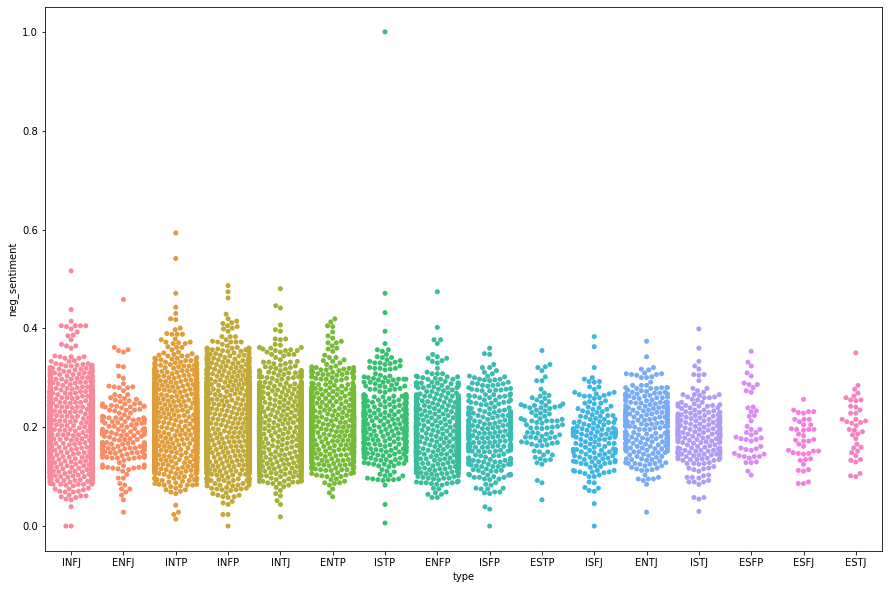

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="neg_sentiment", data=personality_data)

Neutral Sentiment Score by Type

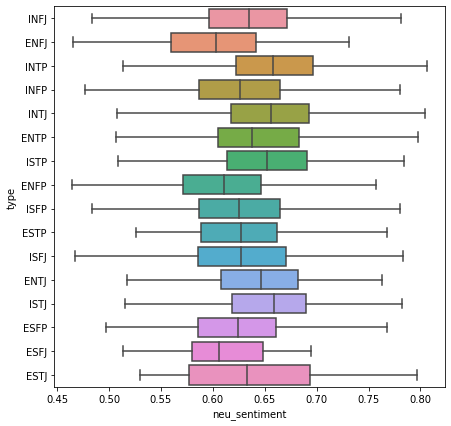

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neu_sentiment", data=personality_data, showfliers=False)

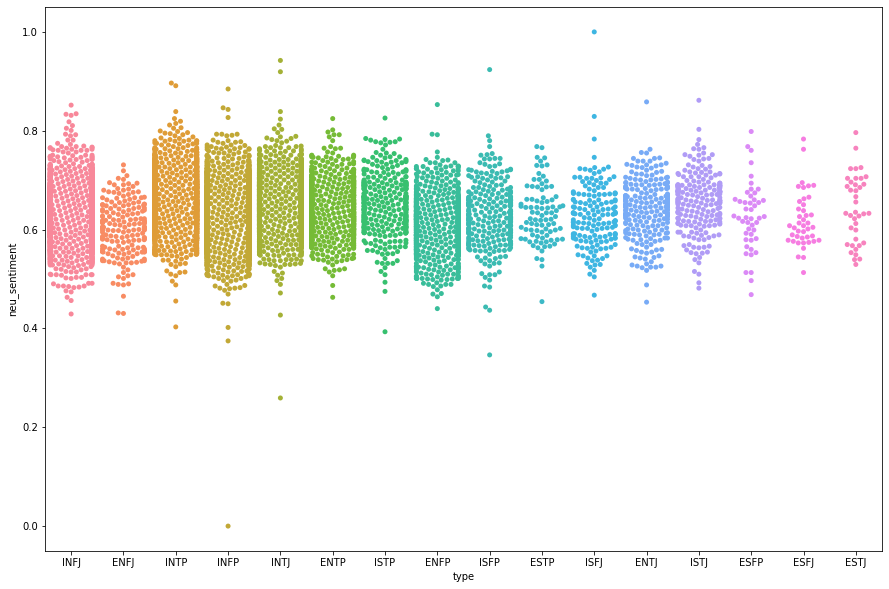

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="neu_sentiment", data=personality_data)

Question marks by type

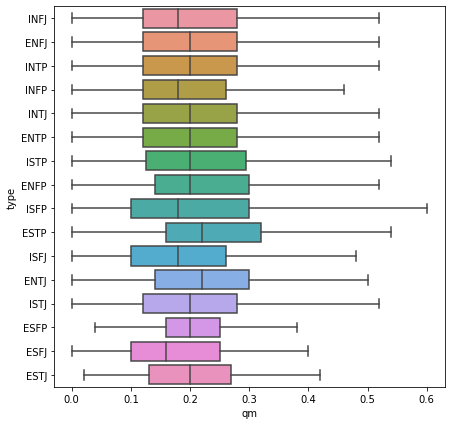

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="qm", data=personality_data, showfliers=False)

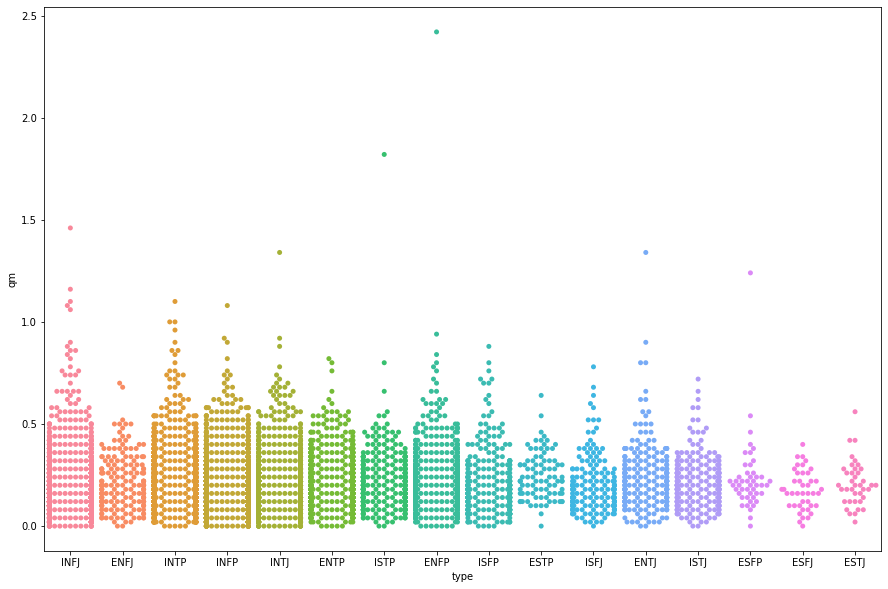

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="qm", data=personality_data)

Exclamation by type

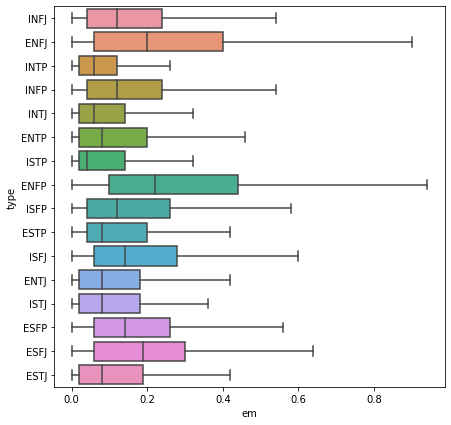

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="em", data=personality_data, showfliers=False)

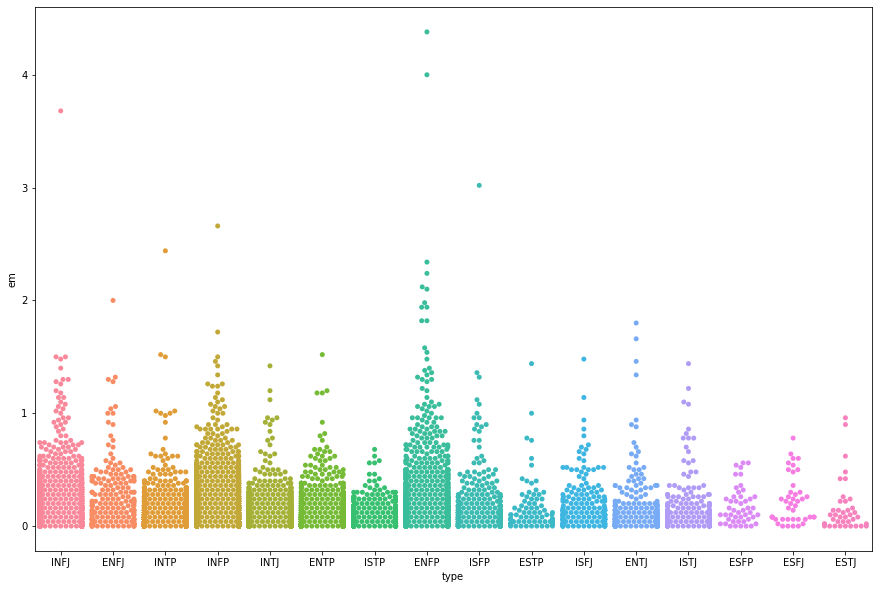

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="em", data=personality_data)

Colons by type

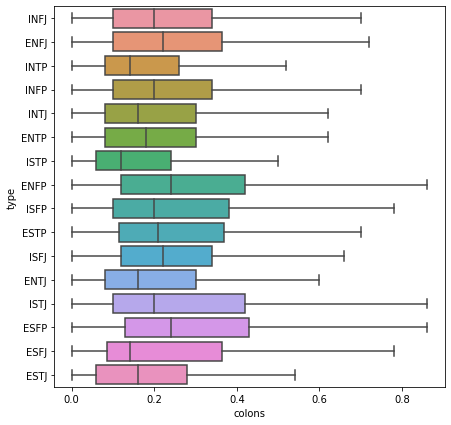

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="colons", data=personality_data, showfliers=False)

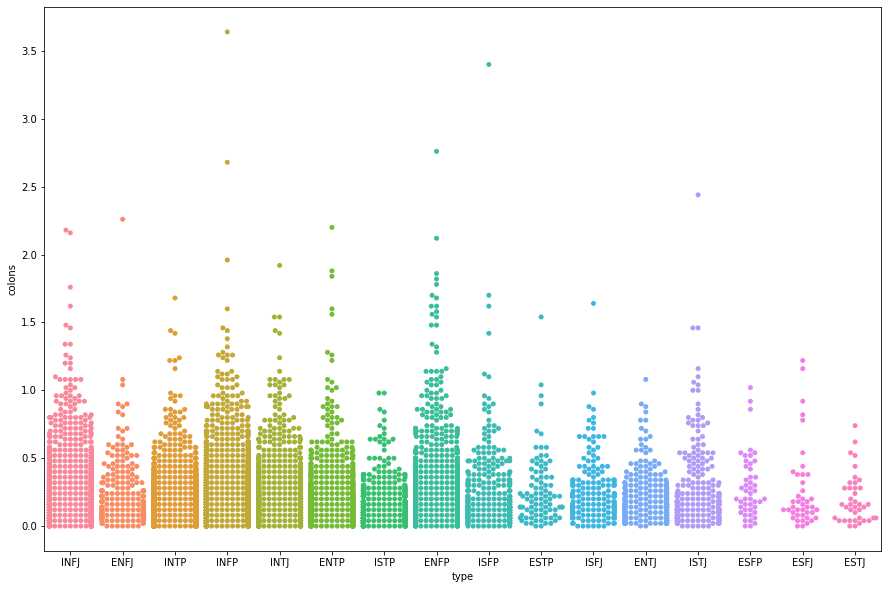

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="colons", data=personality_data)

Emojis by type

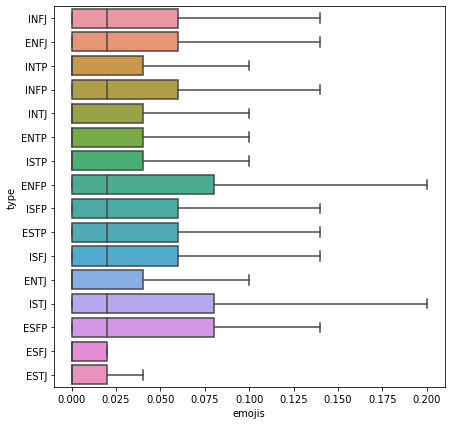

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="emojis", data=personality_data, showfliers=False)

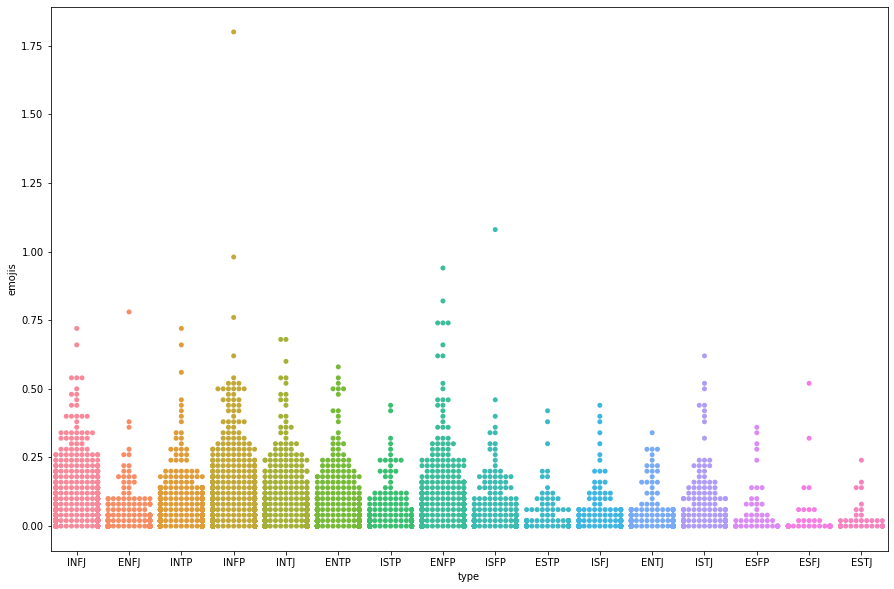

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="type", y="emojis", data=personality_data)

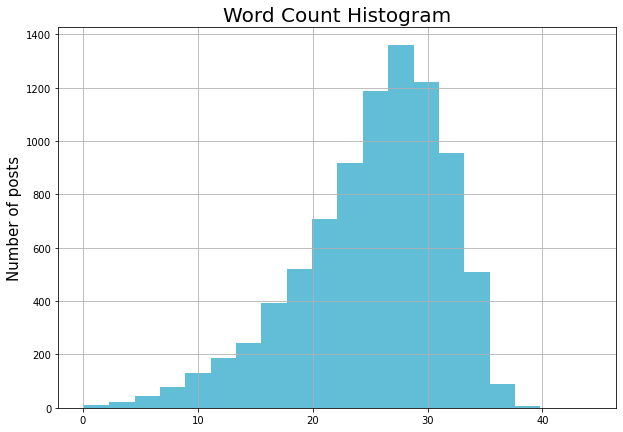

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
personality_data["word_count"].hist(bins=20, color=nt)
plt.show()

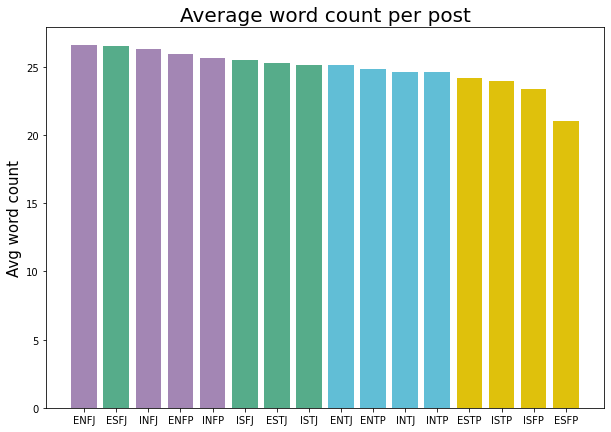

In [ ]:
avg_words_type = (
    personality_data.groupby("type")
    .agg({"word_count": "mean"})
    .sort_values("word_count", ascending=False)
)
colors = {x: colors_d[x] for x in avg_words_type.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Average word count per post", fontsize=20)
plt.ylabel("Avg word count", fontsize=15)
plt.bar(avg_words_type.index, avg_words_type["word_count"], color=list(colors.values()))
plt.show()

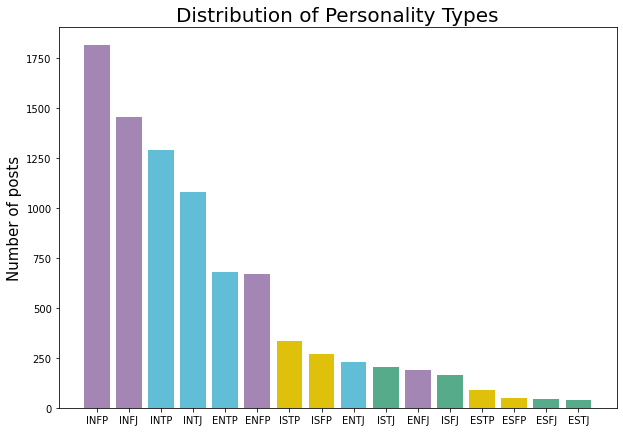

In [ ]:
mb = (
    personality_data.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
colors = {x: colors_d[x] for x in mb.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb["count"], color=list(colors.values()))
plt.show()

In [ ]:
# checking top records
personality_data.head(2)

type  is_Extrovert  is_Sensing  is_Thinking  is_Judging  \
0  INFJ             0           0            0           1   
1  INFJ             0           0            0           1   

                                               posts  \
0  'When asked of the things you wish you did ear...   
1  'I love both and they are equally important to...   

                                         clean_posts  compound_sentiment  \
0   asked thing wish earlier       find answering...              0.9998   
1   love equally important  music window soul  in...              0.9999   

   pos_sentiment  neg_sentiment  ...    em colons emojis  word_count  \
0       0.413333       0.136150  ...  0.22   0.32   0.08       30.98   
1       0.594667       0.134585  ...  0.36   0.14   0.00       28.58   

   unique_words  post_length_var  upper  link_count  ellipses  img_count  
0         14.92        78.414931   1.46        0.04      0.62        0.0  
1         12.72       160.744400   1.62        0.02      0.04        0.0  

[2 rows x 126 columns]

Setting predictors and target variable

In [ ]:
# setting X to clean_posts, compound sentiment score, pos tags and various other counts
X = personality_data[
    [
        "clean_posts",
        "compound_sentiment",
        "ADJ_avg",
        "ADP_avg",
        "ADV_avg",
        "CONJ_avg",
        "DET_avg",
        "NOUN_avg",
        "NUM_avg",
        "PRT_avg",
        "PRON_avg",
        "VERB_avg",
        "qm",
        "em",
        "colons",
        "emojis",
        "word_count",
        "unique_words",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]

# setting y to four target classes -> is_Extrovert, is_Sensing, is_Thinking, is_Judging
y = personality_data.iloc[:, 1:5]

# ensuring that X and y row count matches
print(X.shape)
print(y.shape)

(8588, 22)
(8588, 4)


Creating a list of words (other than the stop words) to be dropped to improve model performanace

In [ ]:
additional_stopwords = [
    "hey",
    "hello",
    "briggs",
    "cat",
    "car",
    "mbti",
    "soup",
    "tea",
    "sport",
    "snow",
    "christmas",
]

Setting up preprocessor for vectorization and selecting best counts and scores

In [ ]:
# preprocessing steps for selecting best k columns/features from counts & scores and for vectorizing words

counts_n_scores = [
    "compound_sentiment",
    "ADJ_avg",
    "ADP_avg",
    "ADV_avg",
    "CONJ_avg",
    "DET_avg",
    "NOUN_avg",
    "NUM_avg",
    "PRT_avg",
    "PRON_avg",
    "VERB_avg",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]

In [ ]:
# for selecting k best features from features other than words
best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k=10))

In [ ]:
# setting up preprocessing for TF-IDF vectorizer
preprocesser_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)


In [ ]:
# setting up preprocessing for COUNT vectorizer
preprocesser_ct = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

Models

In [ ]:
# setting up the personality dictionary for printing scores for each class
mbti_type = {
    "is_Extrovert": "Extrovert vs Introvert",
    "is_Sensing": "Sensing vs Intuition",
    "is_Thinking": "Thinking vs Feeling",
    "is_Judging": "Judging vs Perceiving",
}

# function to build the model for predicting each of the 4 target classes
def build_model(model, X, target, vectorizer_name):

    for col in target.columns:

        print(f"\n{mbti_type[col]}")
        target = y[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, target, test_size=0.2, random_state=42, stratify=target
        )

        # model training
        model.fit(X_train, y_train)

        # y_hat
        y_pred = model.predict(X_test)

        # y_probability
        y_proba = model.predict_proba(X_test)[:, 1]

        # precision recall score
        average_precision = average_precision_score(y_test, y_proba)

        # model evaluation
        print(
            f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
        print(f"Average Precision-Recall Score: {average_precision:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))

TF-IDF Logistic Regression

In [ ]:
%%time

tfidf_logistic_regression = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(tfidf_logistic_regression, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.68
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.45
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.68      0.68      0.77      0.68      0.46      1322
          1       0.39      0.68      0.68      0.49      0.68      0.46       396

avg / total       0.76      0.68      0.68      0.70      0.68      0.46      1718


Sensing vs Intuition
Geometric Mean Score: 0.71
ROC-AUC Score: 0.78
Average Precision-Recall Score: 0.36
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.69      0.74      0.79      0.71      0.50      1481
          1       0.27      0.74      0.69      0.40      0.71      0.51       237

avg / total       0.85      0.69      0.73      0.74      0.71      0.50      1718


Thinking vs Feeling
Geometric Mean Score: 0.79
ROC-AUC Score: 0.87
Average Precision-Recall Score: 0.84
           

Count Vectorized Logistic Regression

In [ ]:
%%time
ct_logistic_regression = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(ct_logistic_regression, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.70
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.66      0.63      0.75      0.65      0.42      1322
          1       0.36      0.63      0.66      0.46      0.65      0.42       396

avg / total       0.74      0.66      0.64      0.68      0.65      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.70
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.65      0.75      0.77      0.70      0.48      1481
          1       0.26      0.75      0.65      0.38      0.70      0.49       237

avg / total       0.85      0.67      0.73      0.72      0.70      0.49      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.82
           

TF-IDF Naive Bayes

In [ ]:
%%time
tfidf_nb = imb_make_pipeline(
    preprocesser_tf, DenseTransformer(), RandomUnderSampler(), MultinomialNB(),
)
build_model(tfidf_nb, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.69
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.45
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.61      0.76      0.73      0.68      0.46      1322
          1       0.37      0.76      0.61      0.50      0.68      0.47       396

avg / total       0.77      0.65      0.73      0.67      0.68      0.46      1718


Sensing vs Intuition
Geometric Mean Score: 0.71
ROC-AUC Score: 0.79
Average Precision-Recall Score: 0.38
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.63      0.80      0.76      0.71      0.49      1481
          1       0.26      0.80      0.63      0.39      0.71      0.51       237

avg / total       0.86      0.65      0.78      0.71      0.71      0.50      1718


Thinking vs Feeling
Geometric Mean Score: 0.76
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.81
           

Count Vectorized Naive Bayes

In [ ]:
%%time
ct_nb = imb_make_pipeline(
    preprocesser_ct, DenseTransformer(), RandomUnderSampler(), MultinomialNB(),
)
build_model(ct_nb, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.69
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.43
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.66      0.71      0.76      0.69      0.47      1322
          1       0.39      0.71      0.66      0.50      0.69      0.47       396

avg / total       0.77      0.67      0.70      0.70      0.69      0.47      1718


Sensing vs Intuition
Geometric Mean Score: 0.70
ROC-AUC Score: 0.79
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.69      0.71      0.79      0.70      0.49      1481
          1       0.27      0.71      0.69      0.39      0.70      0.49       237

avg / total       0.84      0.69      0.71      0.74      0.70      0.49      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.79
           

TF-IDF Random Forest

In [ ]:
%%time
tfidf_rf = imb_make_pipeline(
    preprocesser_tf, DenseTransformer(),
        RandomUnderSampler(),
        RandomForestClassifier(n_estimators=100, max_depth=10),
)
build_model(tfidf_rf, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.66
ROC-AUC Score: 0.70
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.65      0.67      0.74      0.66      0.43      1322
          1       0.37      0.67      0.65      0.47      0.66      0.44       396

avg / total       0.75      0.66      0.66      0.68      0.66      0.43      1718


Sensing vs Intuition
Geometric Mean Score: 0.64
ROC-AUC Score: 0.69
Average Precision-Recall Score: 0.26
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.61      0.68      0.73      0.64      0.41      1481
          1       0.22      0.68      0.61      0.33      0.64      0.41       237

avg / total       0.82      0.62      0.67      0.68      0.64      0.41      1718


Thinking vs Feeling
Geometric Mean Score: 0.75
ROC-AUC Score: 0.81
Average Precision-Recall Score: 0.76
           

Count Vectorized Random Forest

In [ ]:
%%time
ct_rf = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), RandomForestClassifier(n_estimators=100, max_depth=10),
)
build_model(ct_rf, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.63
ROC-AUC Score: 0.69
Average Precision-Recall Score: 0.38
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.64      0.62      0.73      0.63      0.40      1322
          1       0.34      0.62      0.64      0.44      0.63      0.40       396

avg / total       0.73      0.64      0.62      0.66      0.63      0.40      1718


Sensing vs Intuition
Geometric Mean Score: 0.65
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.29
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.62      0.68      0.74      0.65      0.42      1481
          1       0.22      0.68      0.62      0.33      0.65      0.42       237

avg / total       0.83      0.63      0.67      0.69      0.65      0.42      1718


Thinking vs Feeling
Geometric Mean Score: 0.73
ROC-AUC Score: 0.81
Average Precision-Recall Score: 0.77
           

Selecting TF-IDF Logistic Regression as our final model as it returned the highest scores for all metrics - accuracy, precision, recall, roc-auc, avg_precision_recall as compared to other models


Extrovert vs Introvert
                 coef
word                 
fun          3.571805
bored        3.146683
awesome      2.816300
guy          2.648815
inferior    -2.534897
nature      -2.526339
challenge    2.475445
wanna        2.474159
friend       2.461570
instinctual  2.448614
business     2.402841
mind        -2.271208
super        2.249372
game        -2.220046
small       -2.206767
afraid      -2.099275
charming     2.097911
family      -2.072493
amazing      2.067541
question     2.060506
developed    2.051671

Sensing vs Intuition
                  coef
word                  
world        -3.207336
rant          2.998100
idea         -2.831938
type          2.710169
human        -2.641951
fun           2.220613
usually       2.163111
perc          2.150349
hope         -2.107760
kid           2.062335
dont          2.025872
quite        -2.004369
rave          1.965296
intelligence -1.961540
sound         1.951899
fit           1.936308
feel         -1.934904
dark       

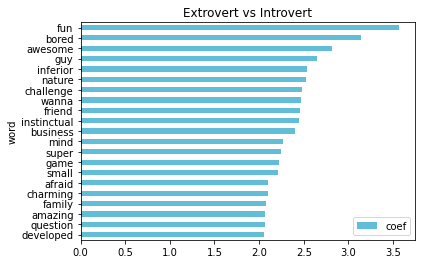

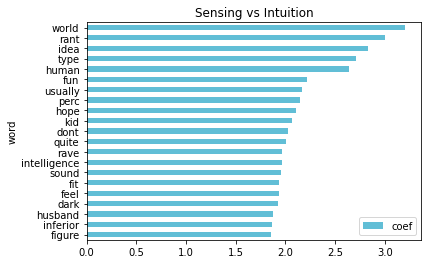

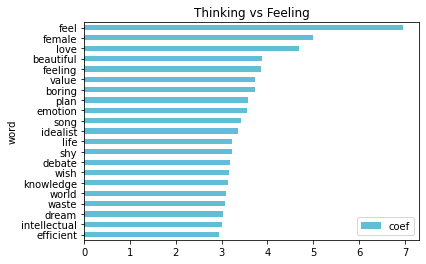

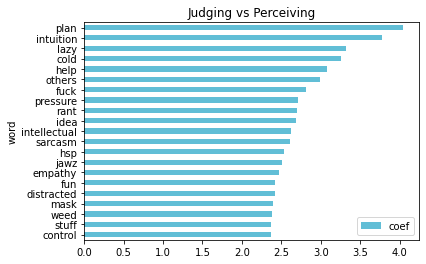

In [ ]:
%%time

for col in y.columns:
    
    print(f"\n{mbti_type[col]}")

    target = y[col]

    tfidf_logistic_regression = imb_make_pipeline(
        preprocesser_tf,
        RandomUnderSampler(),
        LogisticRegressionCV()
    )
    
    # training the data on entire dataset
    tfidf_logistic_regression.fit(X, target)
    
    # feature importance   
    coef = tfidf_logistic_regression[-1].coef_[0]  
    word = tfidf_logistic_regression[0].named_transformers_["tfidf"].get_feature_names()
    word_list = list(zip(word, coef))         
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:21]
    print(result)
    
    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", color="#61BED6", title=mbti_type[col])
  
    # saving the model
    dump(tfidf_logistic_regression, f"clf_{col}.joblib")

Testing Model 

In [ ]:
# importing model
from joblib import load


In [ ]:
# reading the test dataset
path_to_csv = os.path.join("..", "/content/drive/MyDrive/MBTI", "df_holdout.csv")
df = pd.read_csv(path_to_csv)

In [ ]:
df.head(2)

type                                              posts
0  INFJ  'I have never seen so many poorly used memes.....
1  INFJ  'Wow! You are obviously her muse... Be flatter...

In [ ]:
def categorize_types(personality_data):

    personality_data["is_Extrovert"] = personality_data["type"].apply(
        lambda x: 1 if x[0] == "E" else 0
    )
    personality_data["is_Sensing"] = personality_data["type"].apply(
        lambda x: 1 if x[1] == "S" else 0
    )
    personality_data["is_Thinking"] = personality_data["type"].apply(
        lambda x: 1 if x[2] == "T" else 0
    )
    personality_data["is_Judging"] = personality_data["type"].apply(
        lambda x: 1 if x[3] == "J" else 0
    )

    # rearranging the dataframe columns
    personality_data = personality_data[
        ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
    ]


In [ ]:
def clean_posts(personality_data):

    # converting posts into lower case
    personality_data["clean_posts"] = personality_data["posts"].str.lower()

    # replacing ||| with space
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"\|\|\|"), " "
    )

    # replacing urls with domain name
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
        ""
    )

    # dropping emails
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"\S+@\S+"), ""
    )

    # dropping punctuations
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"[^a-z\s]"), " "
    )

    # dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
    mbti = personality_data["type"].unique()
    for type_word in mbti:
        personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
            type_word.lower(), ""
        )
        
    # removing words that are 1 to 2 characters long    
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
    )

    # lemmitizing
    lemmatizer = WordNetLemmatizer()

    personality_data["clean_posts"] = personality_data["clean_posts"].apply(
        lambda x: " ".join(
            [
                lemmatizer.lemmatize(word)
                for word in x.split(" ")
                if word not in stopwords.words("english")
            ]
        )
    )

    # tag_posts will be a list of 50 lists. need it for word stats (per post for each user)
    # replacing urls with domain name
    personality_data["tag_posts"] = personality_data["posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
        lambda match: match.group(2),
    )
    # replacing ||| with space
    personality_data["tag_posts"] = [
        post for post in personality_data["tag_posts"].str.split("\|\|\|")
    ]

In [ ]:
def sentiment_score(personality_data):

    analyzer = SentimentIntensityAnalyzer()

    nlp_sentiment_score = []

    for post in personality_data["clean_posts"]:
        score = analyzer.polarity_scores(post)["compound"]
        nlp_sentiment_score.append(score)

    personality_data["compound_sentiment"] = nlp_sentiment_score

In [ ]:
def pos_tagging(personality_data):

    personality_data["tagged_words"] = personality_data["tag_posts"].apply(
        lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x]
    )

    # grouping pos tags based on stanford list
    tags_dict = {
        "ADJ": ["JJ", "JJR", "JJS"],
        "ADP": ["EX", "TO"],
        "ADV": ["RB", "RBR", "RBS", "WRB"],
        "CONJ": ["CC", "IN"],
        "DET": ["DT", "PDT", "WDT"],
        "NOUN": ["NN", "NNS", "NNP", "NNPS"],
        "NUM": ["CD"],
        "PRT": ["RP"],
        "PRON": ["PRP", "PRP$", "WP", "WP$"],
        "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
        ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
        "X": ["FW", "LS", "UH"],
    }

    def stanford_tag(x, tag):
        tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
        return tags_list

    for col in tags_dict.keys():
        personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
            lambda x: np.mean(stanford_tag(x, col))
        )

In [ ]:
def get_counts(personality_data):
    def unique_words(s):
        unique = set(s.split(" "))
        return len(unique)/50

    def emojis(post):
        # does not include emojis made purely from symbols, only :word:
        emoji_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                if e.count(":") == 2:
                    emoji_count += 1
        return emoji_count/50

    def colons(post):
        # Includes colons used in emojis
        colon_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                colon_count += e.count(":")
        return colon_count/50

    personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?")/50)
    personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!")/50)
    personality_data["colons"] = personality_data["posts"].apply(colons)
    personality_data["emojis"] = personality_data["posts"].apply(emojis)

    personality_data["word_count"] = personality_data["posts"].apply(
        lambda s: (s.count(" ") + 1)/50
    )
    personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

    personality_data["upper"] = personality_data["posts"].apply(
        lambda x: len([x for x in x.split() if x.isupper()])/50
    )
    personality_data["link_count"] = personality_data["posts"].apply(
        lambda s: s.count("http")/50
    )
    ellipses_count = [
        len(re.findall(r"\.\.\.\ ", posts))/50 for posts in personality_data["posts"]
    ]
    personality_data["ellipses"] = ellipses_count
    personality_data["img_count"] = [
        len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post))/50
        for post in personality_data["posts"]
    ]

In [ ]:
def prep_data(personality_data):

    t = time.time()

    categorize_types(personality_data)

    clean_posts(personality_data)

    sentiment_score(personality_data)

    pos_tagging(personality_data)

    get_counts(personality_data)

    features = personality_data[
        [
            "clean_posts",
            "compound_sentiment",
            "ADJ_avg",
            "ADP_avg",
            "ADV_avg",
            "CONJ_avg",
            "DET_avg",
            "NOUN_avg",
            "NUM_avg",
            "PRT_avg",
            "PRON_avg",
            "VERB_avg",
            "qm",
            "em",
            "colons",
            "emojis",
            "word_count",
            "unique_words",
            "upper",
            "link_count",
            "ellipses",
            "img_count",
        ]
    ]

    X = features
    y = personality_data.iloc[:, 2:6]

    print(f"Total Preprocessing Time: {time.time()-t} seconds\n")

    return X, y

In [ ]:
def combine_classes(y_pred1, y_pred2, y_pred3, y_pred4):
    
    combined = []
    for i in range(len(y_pred1)):
        combined.append(
            str(y_pred1[i]) + str(y_pred2[i]) + str(y_pred3[i]) + str(y_pred4[i])
        )
    
    result = trace_back(combined)
    return result
    

def trace_back(combined):
        
    type_list = [
    {"0": "I", "1": "E"},
    {"0": "N", "1": "S"},
    {"0": "F", "1": "T"},
    {"0": "P", "1": "J"},
    ]

    result = []
    for num in combined:
        s = ""
        for i in range(len(num)):
            s += type_list[i][num[i]]
        result.append(s)
        
    return result

In [ ]:
def predict(path_to_csv):

    df = pd.read_csv(path_to_csv)

    X, y = prep_data(df)

    # loading the 4 models
    EorI_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Extrovert.joblib"))
    SorN_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Judging.joblib"))
    TorF_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Sensing.joblib"))
    JorP_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Thinking.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print(
        "Extrovert vs Introvert Accuracy: ",
        accuracy_score(y["is_Extrovert"], EorI_pred),
    )
    print("y_true", y["is_Extrovert"].values)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print(
        "\nSensing vs Intuition Accuracy: ", accuracy_score(y["is_Sensing"], SorN_pred)
    )
    print("y_true", y["is_Sensing"].values)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print(
        "\nThinking vs Feeling Accuracy: ", accuracy_score(y["is_Thinking"], TorF_pred)
    )
    print("y_true", y["is_Thinking"].values)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print(
        "\nJudging vs Perceiving Accuracy: ", accuracy_score(y["is_Judging"], JorP_pred)
    )
    print("y_true", y["is_Judging"].values)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result

In [ ]:
if __name__ == "__main__":
    
    predictions = predict(os.path.join("..", "/content/drive/MyDrive/MBTI", "df_holdout.csv"))
    y_truth = pd.read_csv(os.path.join("..", "/content/drive/MyDrive/MBTI", "df_holdout.csv"))["type"].values

Total Preprocessing Time: 26.05526876449585 seconds

Extrovert vs Introvert Accuracy:  0.6551724137931034
y_true [0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0]
preds [0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 0]

Sensing vs Intuition Accuracy:  0.5747126436781609
y_true [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 1]
preds [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 1]

Thinking vs Feeling Accuracy:  0.5402298850574713
y_true [0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0

In [ ]:
df["result"] = predictions
df

type                                              posts result
0   INFJ  'I have never seen so many poorly used memes.....   INFP
1   INFJ  'Wow! You are obviously her muse... Be flatter...   ESFP
2   ENFP  'Are you shitting me? He's so type 7 its not e...   ENTJ
3   ENTP  'Oh man, this is serious. Good luck with her! ...   ESFJ
4   INFP  'Haha. Thank you! You guys have been so nice. ...   ENFP
..   ...                                                ...    ...
82  ISTP  'Hey, so incidentally, that's the exact same t...   ENFP
83  INTJ  'I would answer your questions but I don't kno...   ENTJ
84  INFJ  'I am the same. What I do,  is send them occas...   ISTP
85  INTP  'Important that i'm attracted to her at least ...   INFP
86  ISTJ  This thread is dead but, watching the show som...   ISTP

[87 rows x 3 columns]

In [ ]:
df["result"] = predictions
df

In [ ]:
mbti = [
    "INFP",
    "INFJ",
    "INTP",
    "INTJ",
    "ENTP",
    "enfp",
    "ISTP",
    "ISFP",
    "ENTJ",
    "ISTJ",
    "ENFJ",
    "ISFJ",
    "ESTP",
    "ESFP",
    "ESFJ",
    "ESTJ",
]
tags_dict = {
    "ADJ_avg": ["JJ", "JJR", "JJS"],
    "ADP_avg": ["EX", "TO"],
    "ADV_avg": ["RB", "RBR", "RBS", "WRB"],
    "CONJ_avg": ["CC", "IN"],
    "DET_avg": ["DT", "PDT", "WDT"],
    "NOUN_avg": ["NN", "NNS", "NNP", "NNPS"],
    "NUM_avg": ["CD"],
    "PRT_avg": ["RP"],
    "PRON_avg": ["PRP", "PRP$", "WP", "WP$"],
    "VERB_avg": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
    "X": ["FW", "LS", "UH"],
}
features = [
    "clean_posts",
    "compound_sentiment",
    "ADJ_avg",
    "ADP_avg",
    "ADV_avg",
    "CONJ_avg",
    "DET_avg",
    "NOUN_avg",
    "NUM_avg",
    "PRT_avg",
    "PRON_avg",
    "VERB_avg",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]

In [ ]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique)


def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count


def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count


def lemmitize(s):
    lemmatizer = WordNetLemmatizer()
    new_s = ""
    for word in s.split(" "):
        lemmatizer.lemmatize(word)
        if word not in stopwords.words("english"):
            new_s += word + " "
    return new_s[:-1]
def clean(s):
    # remove urls
    s = re.sub(re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+).*"), "", s)
    # remove emails
    s = re.sub(re.compile(r"\S+@\S+"), "", s)
    # remove punctuation
    s = re.sub(re.compile(r"[^a-z\s]"), "", s)
    # Make everything lowercase
    s = s.lower()
    # remove all personality types
    for type_word in mbti:
        s = s.replace(type_word.lower(), "")
    return s


def prep_counts(s):
    clean_s = clean(s)
    d = {
        "clean_posts": lemmitize(clean_s),
        "link_count": s.count("http"),
        "youtube": s.count("youtube") + s.count("youtu.be"),
        "img_count": len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", s)),
        "upper": len([x for x in s.split() if x.isupper()]),
        "char_count": len(s),
        "word_count": clean_s.count(" ") + 1,
        "qm": s.count("?"),
        "em": s.count("!"),
        "colons": colons(s),
        "emojis": emojis(s),
        "unique_words": unique_words(clean_s),
        "ellipses": len(re.findall(r"\.\.\.\ ", s)),
    }
    return clean_s, d
def prep_sentiment(s):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(s)
    d = {
        "compound_sentiment": score["compound"],
        "pos_sentiment": score["pos"],
        "neg_sentiment": score["neg"],
        "neu_sentiment": score["neu"],
    }
    return d


def tag_pos(s):
    tagged_words = nltk.pos_tag(word_tokenize(s))
    d = dict.fromkeys(tags_dict, 0)
    for tup in tagged_words:
        tag = tup[1]
        for key, val in tags_dict.items():
            if tag in val:
                tag = key
        d[tag] += 1
    return d


def prep_data(s):
    clean_s, d = prep_counts(s)
    d.update(prep_sentiment(lemmitize(clean_s)))
    d.update(tag_pos(clean_s))
    return pd.DataFrame([d])[features]


if __name__ == "__main__":
    t = time.time()
    string = "That somehow managed to be record short yet answer almost all the questions we would've asked, haha! Hi Deb! Welcome to Hou Tian; nice to meet you! I'm Jhenne, one of the mods here-- which means I gotta give you the modly speech :] Make sure to check out the Mandatory Reading up top! Our constantly updated Library is also a great resource, though it isn't mandatory reading-- we like to tell members to 'read as you need', rather than marathon read it all at once. One of the most helpful threads is the Gameplay So Far thread, which breaks down what all has gone down on the boards. (Now, the summary for January isn't tossed up yet, but we'd be happy to break down what you missed if you'd like.) I see that you're interested in Mai! That means both the Trying for a Canon Character page, and the Canon Character Rules and Consequences post will be helpful to check out. If you're ever considering an original character, we have our player-made adoptables list, and our factions, comprised of the Jade Shark/Bending Opposition, Original People of the Flame, and The Bending Crime Syndicates. As far as characters go, in the past tense I play Srai, a Jade Shark [s]that is very very dusty. In the Korraverse I play a reporter named Chihiro, and an ex-taxi dancer/wannabe actress named Naoki, and a Republic City University student named Haruna. I think that's it! If you have any questions, don't hesitate to ask a mod, or drop it right here in this thread so we can get back to you! Again, welcome! #CONFETTI"
    print(string)
    print(prep_data(string))
    print(f"Preprocessing Time: {time.time() - t} seconds")

That somehow managed to be record short yet answer almost all the questions we would've asked, haha! Hi Deb! Welcome to Hou Tian; nice to meet you! I'm Jhenne, one of the mods here-- which means I gotta give you the modly speech :] Make sure to check out the Mandatory Reading up top! Our constantly updated Library is also a great resource, though it isn't mandatory reading-- we like to tell members to 'read as you need', rather than marathon read it all at once. One of the most helpful threads is the Gameplay So Far thread, which breaks down what all has gone down on the boards. (Now, the summary for January isn't tossed up yet, but we'd be happy to break down what you missed if you'd like.) I see that you're interested in Mai! That means both the Trying for a Canon Character page, and the Canon Character Rules and Consequences post will be helpful to check out. If you're ever considering an original character, we have our player-made adoptables list, and our factions, comprised of the

In [ ]:
def predict(s):
    return len(s.split(" "))


def predict_e(s):

    X = prep_data(s)

    # loading the 4 models
    EorI_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Extrovert.joblib"))
    SorN_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Judging.joblib"))
    TorF_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Sensing.joblib"))
    JorP_model = load(os.path.join("..", "/content/drive/MyDrive/MBTI/Model", "/content/clf_is_Thinking.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result[0]


if __name__ == "__main__":
    t = time.time()
    # sample test string. Type ISTP.
    string = "I plugged the data into tableau to see how the different features or how various mathematical formulas relate to the Weight. Once I had a few that didn’t have a wide distribution, I just started trying different models, even ones we hadn’t gone over yet. There are a LOT of regression models. I do not like this try everything method, it’s inefficient and illogical."
    print(predict_e(string))
    print(f"Preprocessing Time: {(time.time() - t):.2f} seconds")

preds [1]
preds [0]
preds [0]
preds [1]
ENFJ
Preprocessing Time: 2.14 seconds
